# SECOP 1 - EDA

In [4]:
import pandas as pd
import numpy as np
import datetime
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff
from warnings import filterwarnings
pd.options.display.max_columns = 500

In [5]:
import seaborn as sns
import missingno as msgo
import plotly_express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [6]:
df = pd.read_csv("SECOP_I.csv")



C:\Users\jreyes\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning:

Columns (34,38,42,44,57,65,66) have mixed types. Specify dtype option on import or set low_memory=False.



In [6]:
import random
p = 0.01  # 1% of the lines
# keep the header, then take only 1% of lines
# if random from [0,1] interval is greater than 0.01 the row will be skipped
df_small = pd.read_csv(
         "SECOP_I.csv",
         header=0, 
         skiprows=lambda i: i>0 and random.random() > p
)

C:\Users\jreyes\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning:

Columns (65) have mixed types. Specify dtype option on import or set low_memory=False.



#### "Head"

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6543008 entries, 0 to 6543007
Data columns (total 69 columns):
UID                                               object
Anno Cargue SECOP                                 int64
Anno Firma del Contrato                           int64
Nivel Entidad                                     object
Orden Entidad                                     object
Nombre de la Entidad                              object
NIT de la Entidad                                 object
Código de la Entidad                              float64
ID Tipo de Proceso                                int64
Tipo de Proceso                                   object
Estado del Proceso                                object
Causal de Otras Formas de Contratacion Directa    object
ID Regimen de Contratacion                        int64
Regimen de Contratacion                           object
ID Objeto a Contratar                             int64
Objeto a Contratar                  

In [8]:
df_sample = df.sample(n=100000, random_state=1)
df_sample.to_csv("df_sample100k.csv")

In [7]:
### Histograms

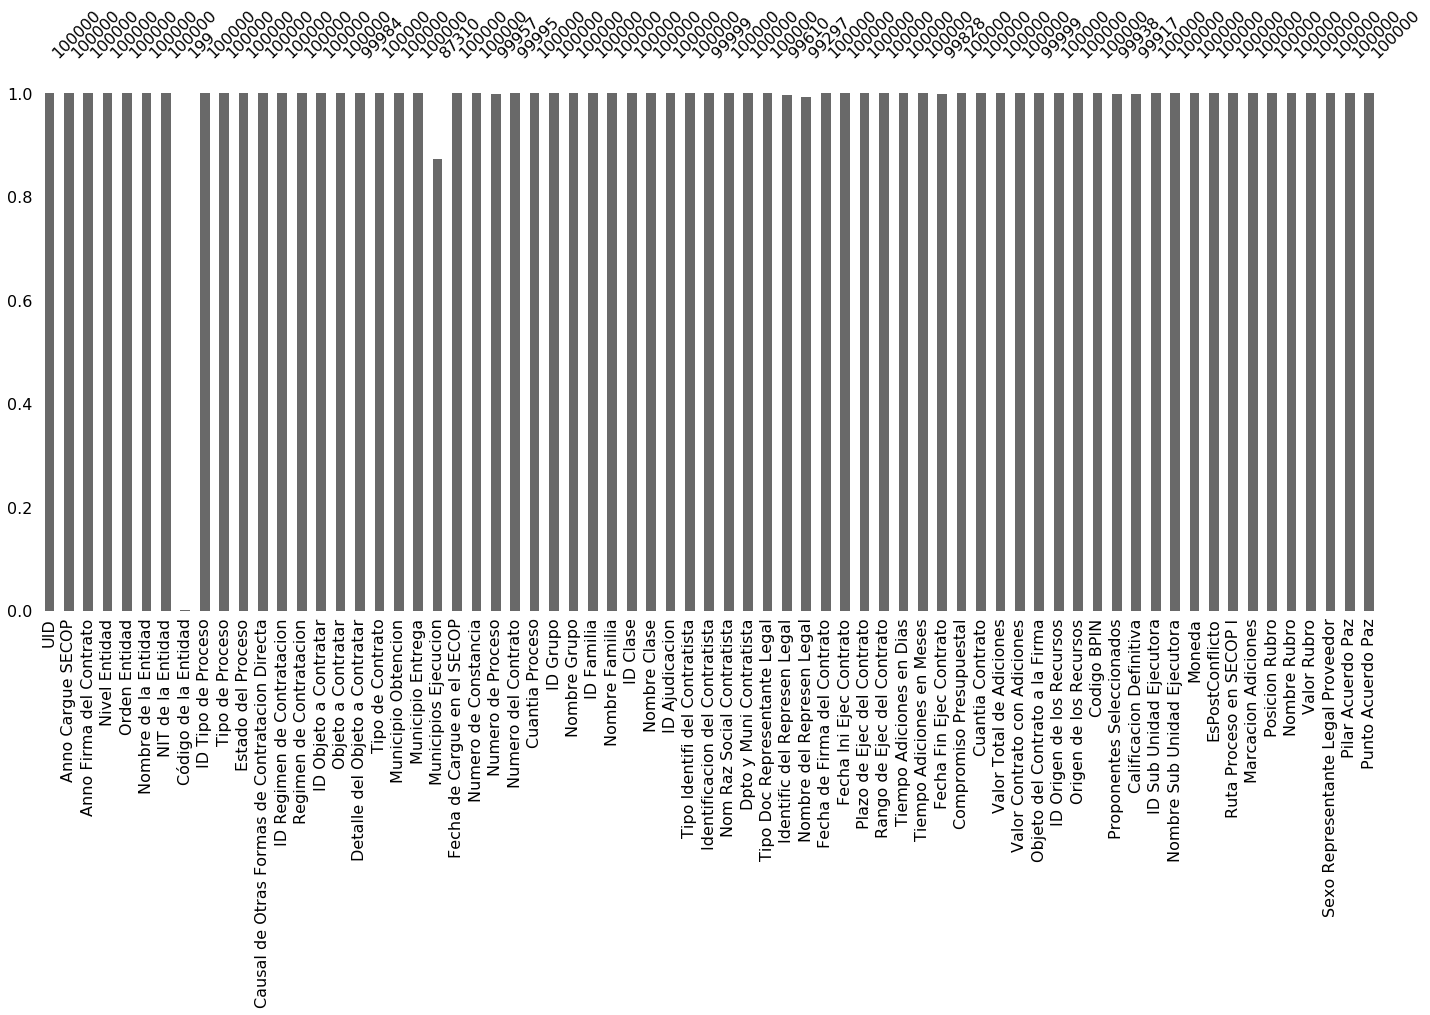

In [9]:
msgo.bar(df_sample)

In [10]:
df_sample.describe().T

,count,mean,std,min,25%,50%,75%,max
Anno Cargue SECOP,100000.0,2.016057e+03,2.193020e+00,2011.0,2015.0,2016.0,2018.0,2.019000e+03
Anno Firma del Contrato,100000.0,2.015975e+03,2.212611e+00,2011.0,2015.0,2016.0,2018.0,2.019000e+03
Código de la Entidad,199.0,1.214631e+08,3.503747e+07,2110150.0,116001000.0,118004002.0,118004002.0,2.990001e+08
ID Tipo de Proceso,100000.0,9.795590e+00,3.789244e+00,1.0,4.0,12.0,12.0,2.200000e+01
ID Regimen de Contratacion,100000.0,2.716660e+00,4.514205e-01,1.0,2.0,3.0,3.0,3.000000e+00
ID Objeto a Contratar,100000.0,7.450744e+07,1.710497e+07,10000000.0,78000000.0,80000000.0,83000000.0,9.500000e+07
ID Familia,100000.0,5.259058e+03,3.705689e+03,0.0,0.0,8010.0,8014.0,9.514000e+03
ID Clase,100000.0,5.259177e+05,3.705757e+05,0.0,0.0,801015.0,801415.0,9.514180e+05
ID Ajudicacion,100000.0,5.150636e+06,2.437351e+06,475511.0,3309968.0,5285443.0,7237138.0,9.113613e+06
Tiempo Adiciones en Meses,100000.0,1.066300e-01,1.195590e+00,0.0,0.0,0.0,0.0,1.120000e+02


C:\Users\jreyes\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



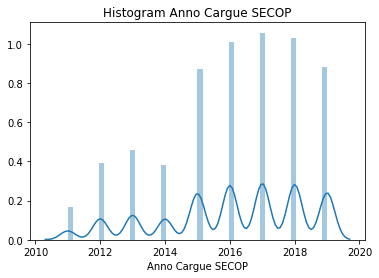

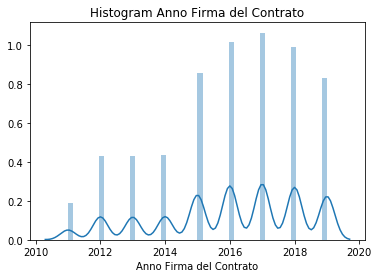

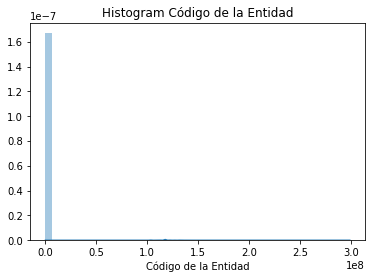

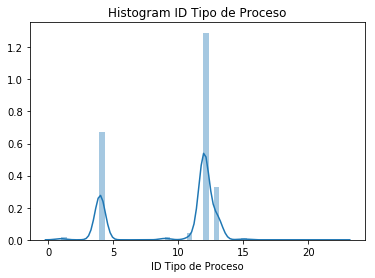

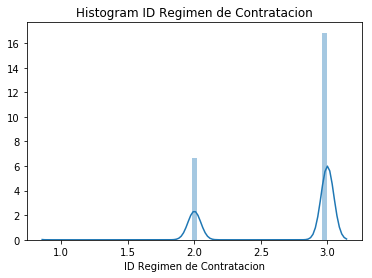

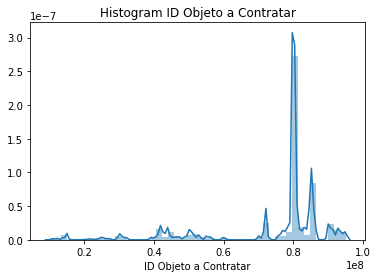

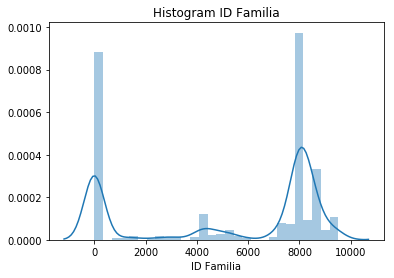

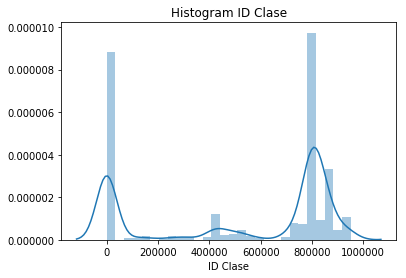

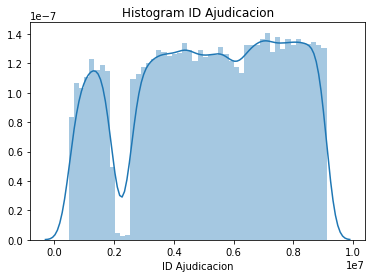

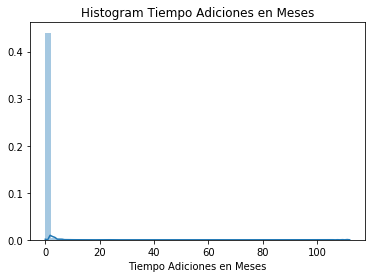

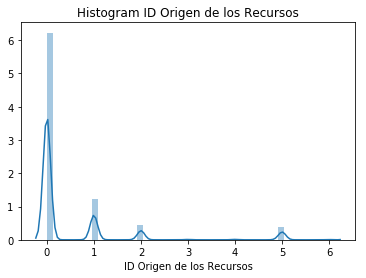

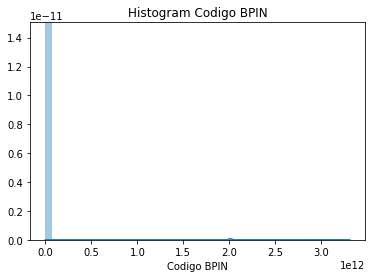

<Figure size 432x288 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt

for i in df_sample.select_dtypes(exclude=['object']).columns.unique():
    sns.distplot(df_sample[i].fillna(-1))
    plt.title('Histogram {}'.format(i))
    plt.figure()

In [ ]:
### Buscar patron entre entidad, estado del proceso, 'Municipio Obtencion', 'Municipio Entrega', 'Municipios Ejecucion',
### 'Dpto y Muni Contratista','Cuantia Contrato', 'Valor Total de Adiciones',tiempo adicionaes en meses

In [23]:
categorical_Cols = ['UID', 'Nivel Entidad', 'Orden Entidad', 'Nombre de la Entidad',
       'NIT de la Entidad', 'Tipo de Proceso', 'Estado del Proceso',
       'Causal de Otras Formas de Contratacion Directa',
       'Regimen de Contratacion', 'Objeto a Contratar',
       'Detalle del Objeto a Contratar', 'Tipo de Contrato',
       'Municipio Obtencion', 'Municipio Entrega', 'Municipios Ejecucion',
       'Fecha de Cargue en el SECOP', 'Numero de Constancia',
       'Numero de Proceso', 'Numero del Contrato', 'Cuantia Proceso',
       'ID Grupo', 'Nombre Grupo', 'Nombre Familia', 'Nombre Clase',
       'Tipo Identifi del Contratista', 'Identificacion del Contratista',
       'Nom Raz Social Contratista', 'Dpto y Muni Contratista',
       'Tipo Doc Representante Legal', 'Identific del Represen Legal',
       'Nombre del Represen Legal', 'Fecha de Firma del Contrato',
       'Fecha Ini Ejec Contrato', 'Plazo de Ejec del Contrato',
       'Rango de Ejec del Contrato', 'Tiempo Adiciones en Dias',
       'Fecha Fin Ejec Contrato', 'Compromiso Presupuestal',
       'Cuantia Contrato', 'Valor Total de Adiciones',
       'Valor Contrato con Adiciones', 'Objeto del Contrato a la Firma',
       'Origen de los Recursos', 'Proponentes Seleccionados',
       'Calificacion Definitiva', 'ID Sub Unidad Ejecutora',
       'Nombre Sub Unidad Ejecutora', 'Moneda', 'EsPostConflicto',
       'Ruta Proceso en SECOP I', 'Marcacion Adiciones', 'Posicion Rubro',
       'Nombre Rubro', 'Valor Rubro', 'Sexo Representante Legal Proveedor',
       'Pilar Acuerdo Paz', 'Punto Acuerdo Paz']

In [23]:
#entidad, estado del proceso, 'Municipio Obtencion', 'Municipio Entrega', 'Municipios Ejecucion',
### 'Dpto y Muni Contratista','Cuantia Contrato', 'Valor Total de Adiciones',tiempo adicionaes en meses

In [ ]:
## Prelimpieza de datos asociados a la cuantia del contrato 

In [22]:
df_sample[['Cuantia Contrato', 'Valor Total de Adiciones',"Tiempo Adiciones en Meses"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 4662076 to 4483483
Data columns (total 3 columns):
Cuantia Contrato             100000 non-null float64
Valor Total de Adiciones     100000 non-null object
Tiempo Adiciones en Meses    100000 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.1+ MB


In [18]:
df_sample['Cuantia Contrato'] = [x.replace(",","") for x in df_sample['Cuantia Contrato'] ]

In [21]:
df_sample['Cuantia Contrato'] = [float(x) for x in df_sample['Cuantia Contrato'] ]

In [25]:
df_sample['Valor Total de Adiciones']= [x.replace(",","") for x in df_sample['Valor Total de Adiciones'] ]

In [26]:
df_sample['Valor Total de Adiciones'] = [float(x) for x in df_sample['Valor Total de Adiciones'] ]

In [30]:
aggfunc2 = {'Cuantia Contrato':["min","max","mean","sum"],
            'Valor Total de Adiciones':["min","max","mean","sum"],
            "Tiempo Adiciones en Meses":["min","max","mean","sum"]}
df_sample.groupby(['Nombre de la Entidad', 'Estado del Proceso', 'Municipio Obtencion', 'Municipio Entrega', 'Municipios Ejecucion']).agg(aggfunc2)

Cuantia Contrato  \
                                                                                                                                                                                 min   
Nombre de la Entidad                               Estado del Proceso     Municipio Obtencion Municipio Entrega  Municipios Ejecucion                                                  
ADMINISTRADORA COLOMBIANA DE PENSIONES (COLPENS... Celebrado              Ibagué              Bogotá D.C.        Tolima - Ibagué                                        8.761718e+08   
                                                                          No definido         No definido        Amazonas - Leticia; Antioquia - Apartadó; Antio...     1.363000e+10   
                                                                                                                 Antioquia - Medellín                                   3.221332e+07   
                                                                                                                 Atlántico - Barranquilla; Bolívar - Cartagena          4.871783e+08   
                                                                                                                 Bogotá D.C. - Bogotá D.C.                              2.580140e+05   
                                                                                                                 Colombia - Todo el pais                                1.040000e+07   
                                                                                                                 Cundinamarca - Girardot; La Guajira - Riohacha         2.985840e+06   
                                                                                                                 Nariño - Pasto                                         1.928160e+07   
                                                                                                                 Sucre - Sincelejo                                      2.945800e+07   
                                                                                                                 Tolima - Ibagué                                        6.644000e+07   
                                                                                                                 Valle del Cauca - Cali                                 2.768046e+08   
                                                   Terminado sin Liquidar No definido         No definido        Bogotá D.C. - Bogotá D.C.                              1.740000e+06   
ADMINISTRADORA DE LOS RECURSOS DEL SISTEMA GENE... Celebrado              No definido         No definido        Bogotá D.C. - Bogotá D.C.                              1.457159e+07   
AERONÁUTICA CIVIL (AEROCIVIL)                      Celebrado              Barranquilla        Barranquilla       Atlántico - Barranquilla                               4.356039e+06   
                                                                                                                 Atlántico - Barranquilla; Bolívar - Mompós             1.201762e+07   
                                                                                                                 Cesar - Valledupar                                     5.280000e+06   
                                                                                                                 La Guajira - Riohacha                                  3.305304e+06   
                                                                          Bogotá D.C.         Bogotá D.C.        Atlántico - Barranquilla                               1.415261e+08   
                                                                                                                 Bogotá D.C. - Bogotá D.C.                              1.160000e+05   
                                                                                                                 Boy